In [6]:
import numpy as np
import matplotlib.pyplot as plt

### (6.63) Gaussian, Linear, Constant Kernels

In [26]:
def gaussian_kernel(x_n, x_m, alpha, beta):
    return alpha * np.exp(-beta/2*(x_n-x_m)**2)

def linear_kernel(x_n, x_m, alpha):
    return alpha * x_n*x_m

def constant_kernel(x_n, x_m, alpha):
    return alpha


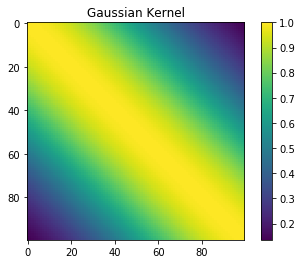

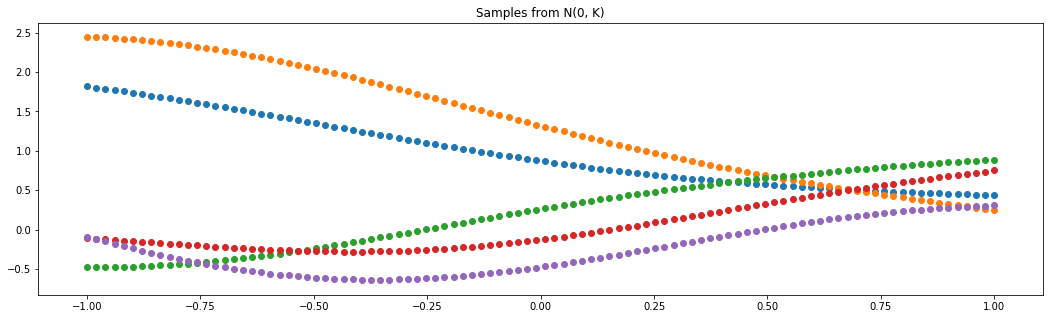

In [19]:
N = 100
X = np.linspace(-1, 1, N)

K = np.zeros([N, N])
for n in range(N):
    for m in range(N):
        K[n, m] = gaussian_kernel(X[n], X[m], 1, 1)

plt.imshow(K)
plt.title('Gaussian Kernel, beta=1')
plt.colorbar()
plt.show()

mean = np.zeros(N)


plt.figure(figsize=[18, 5])
plt.title('Samples from N(0, K)')
for _ in range(5):
    sample = np.random.multivariate_normal(mean, K, 1)
    plt.scatter(X, sample)
plt.show()

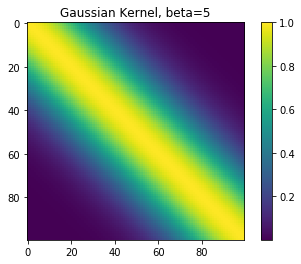

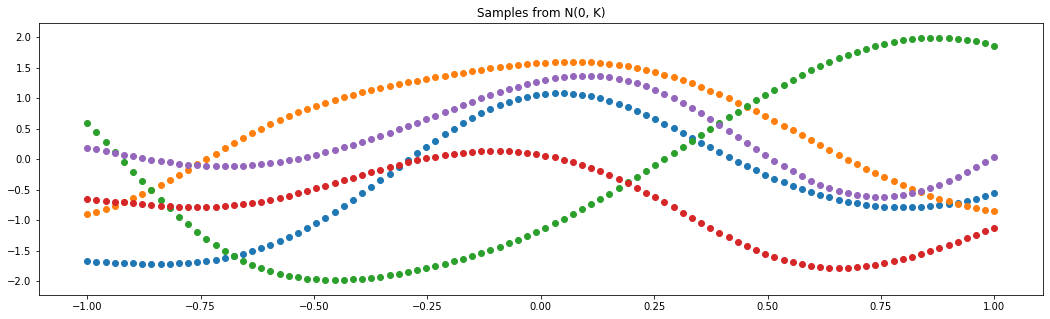

In [22]:
N = 100
X = np.linspace(-1, 1, N)

K = np.zeros([N, N])
for n in range(N):
    for m in range(N):
        K[n, m] = gaussian_kernel(X[n], X[m], 1, 5)

plt.imshow(K)
plt.title('Gaussian Kernel, beta=5')
plt.colorbar()
plt.show()

mean = np.zeros(N)


plt.figure(figsize=[18, 5])
plt.title('Samples from N(0, K)')
for _ in range(5):
    sample = np.random.multivariate_normal(mean, K, 1)
    plt.scatter(X, sample)
plt.show()

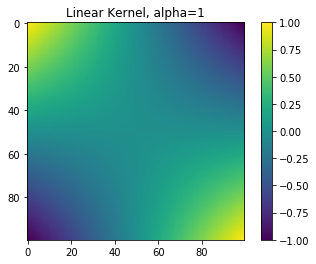

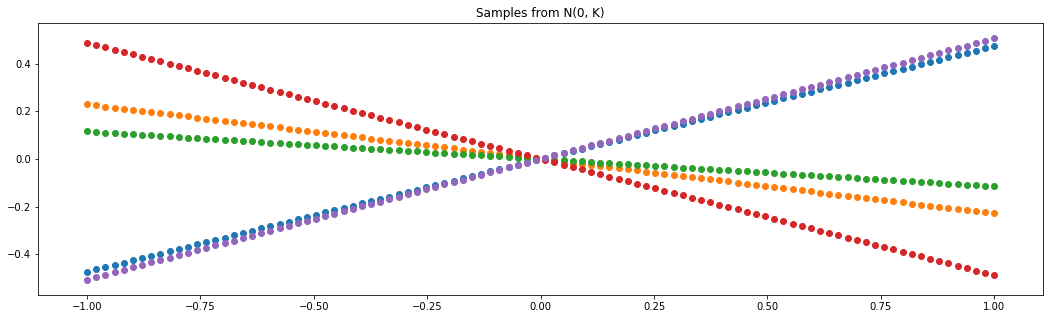

In [25]:
N = 100
X = np.linspace(-1, 1, N)

K = np.zeros([N, N])
for n in range(N):
    for m in range(N):
        K[n, m] = linear_kernel(X[n], X[m], 1)

plt.imshow(K)
plt.title('Linear Kernel, alpha=1')
plt.colorbar()
plt.show()

mean = np.zeros(N)


plt.figure(figsize=[18, 5])
plt.title('Samples from N(0, K)')
for _ in range(5):
    sample = np.random.multivariate_normal(mean, K, 1)
    plt.scatter(X, sample)
plt.show()

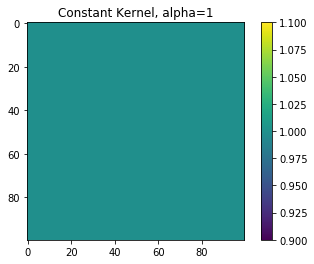

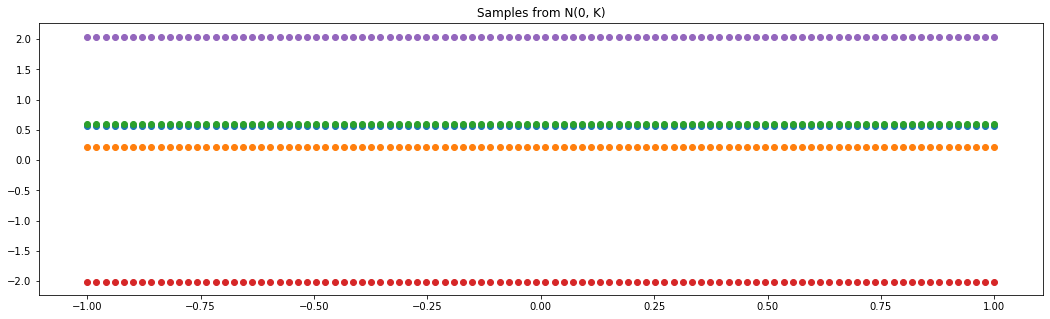

In [35]:
N = 100
X = np.linspace(-1, 1, N)

K = np.zeros([N, N])
for n in range(N):
    for m in range(N):
        K[n, m] = constant_kernel(X[n], X[m], 1)

plt.imshow(K)
plt.title('Constant Kernel, alpha=1')
plt.colorbar()
plt.show()

mean = np.zeros(N)


plt.figure(figsize=[18, 5])
plt.title('Samples from N(0, K)')
for _ in range(5):
    sample = np.random.multivariate_normal(mean, K, 1)
    plt.scatter(X, sample)
plt.show()

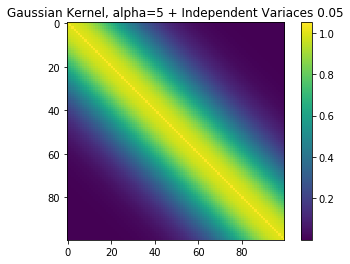

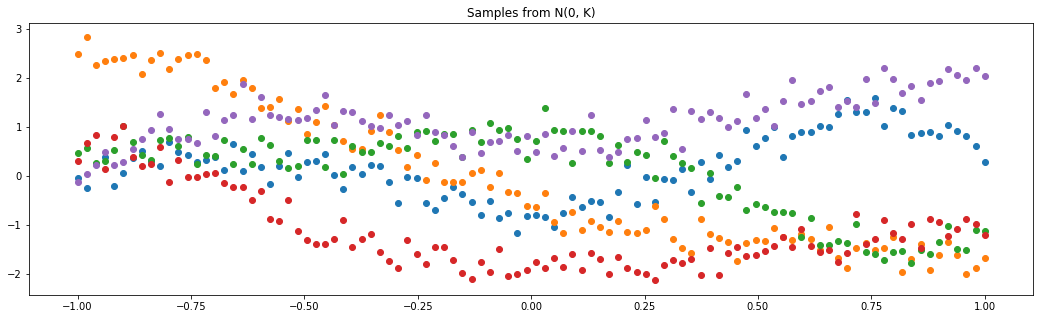

In [44]:
N = 100
X = np.linspace(-1, 1, N)

K = np.zeros([N, N])
for n in range(N):
    for m in range(N):
        K[n, m] = gaussian_kernel(X[n], X[m], 1, 5)

K += np.eye(N, N) * 0.05
        
plt.imshow(K)
plt.title('Gaussian Kernel, alpha=5 + Independent Variaces 0.05')
plt.colorbar()
plt.show()

mean = np.zeros(N)


plt.figure(figsize=[18, 5])
plt.title('Samples from N(0, K)')
for _ in range(5):
    sample = np.random.multivariate_normal(mean, K, 1)
    plt.scatter(X, sample)
plt.show()

### Source from : https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

//anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
//anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([      -0., 33554432.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 100, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


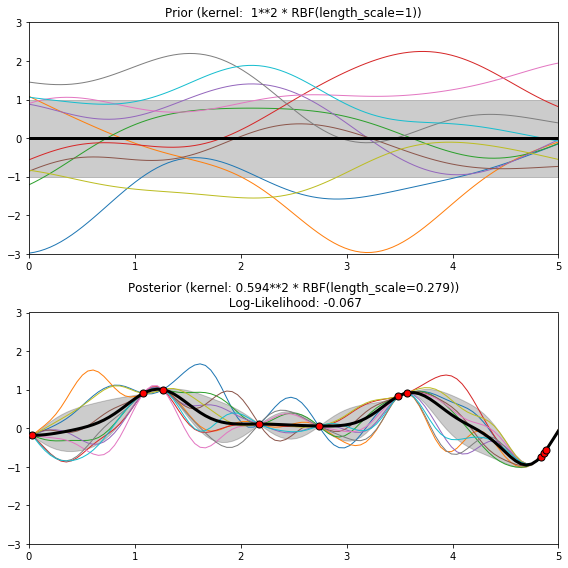

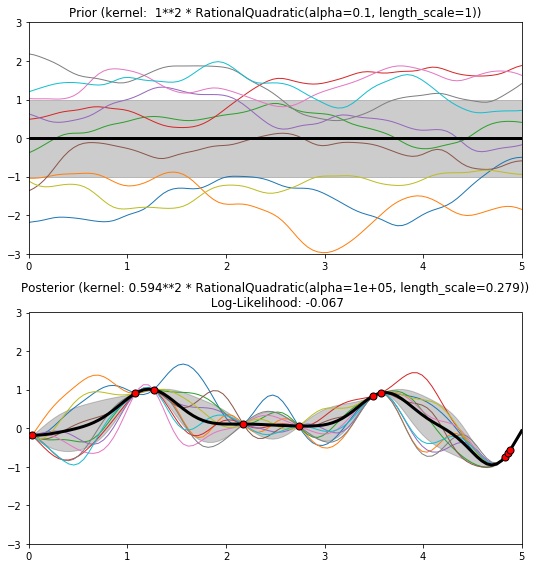

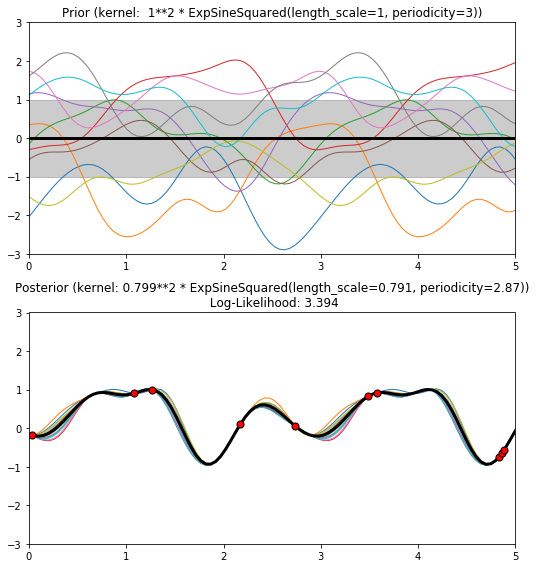

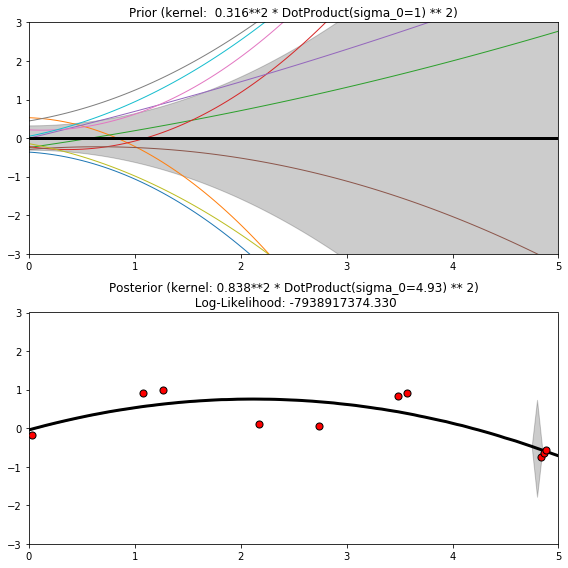

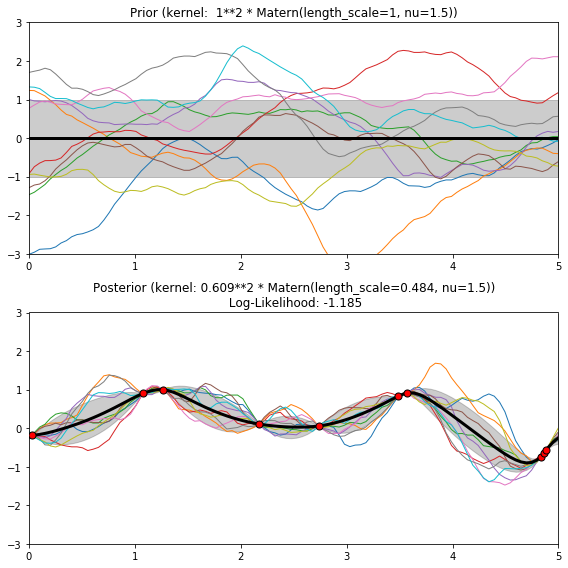

In [58]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

'''
RBF, Rational Quadratic, ExpSineSquared, DotProduct, Matern 커널 별로 GP 실행
'''
for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel) 

    # Plot prior
    '''
    [0, 5] 사이의 100개의 값을 등간격으로 샘플링하고, 해당 GP를 실행하여 y_mean, y_std를 얻고 보여줌
    '''
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    '''
    [0, 5] 사이의 5개 X값을 랜덤하게 샘플링하고 Y=sin((X-2.5)^2)값을 얻은 후, GP를 트레이닝
    '''
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    '''
    트레이닝 된 GP 오브젝트로부터 y_mean과 y_std를 얻고 보여줌
    '''
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()